# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  Dataset dapat diperoleh dari Kaggle
2. **Nama Dataset**  :  Klasifikasi Penyakit Jantung
3. **Keterangan**    :
Berikut ini adalah fitur yang akan saya gunakan untuk memprediksi variabel target (penyakit jantung atau tidak ada penyakit jantung).

- age  : Usia dalam tahun
- sex  :(1 = male; 0 = female)
- cp   :chest pain type (0,1,2,3)

        0: Typical angina: nyeri dada khas penyakit jantung (resiko jantung tinggi)
        1: Atypical angina: nyeri dada tidak khas (resiko jantung tinggi)
        2: Non-anginal pain: nyeri dada bukan karena jantung (risiko jantung rendah)
        3: Asymptomatic: tidak ada nyeri sama sekali (Risiko jantung bisa tinggi,karena tidak terasa gejalanya)

- trestbps : tekanan darah saat istirahat(dalam satuan mmHg )
- chol     : serum cholestoral (dalam satuan mg/dl)
- fbs      : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- restecg  : resting ECG results

    0 : Normal
    
    1 : ST-T wave abnormality (kelainan gelombang ST-T)
    
    2: Left Ventricular Hypertrophy (LVH)

- thalach : denyut jantung maksimum
- exang   : latihan diinduksi angina (1 = yes; 0 = no)
- oldpeak : penurunan segmen ST pada hasil EKG
- slope   : kemiringan segmen ST latihan puncak
        
    0: Upsloping: detak jantung yang lebih baik dengan olahraga (tidak biasa)
    
    1: Flat: perubahan minimal (jantung sehat yang khas)
    
    2: Downslopins: tanda-tanda jantung yang tidak sehat

- ca : jumlah pembuluh darah utama (0-4) diwarnai oleh flourosopy
        pembuluh berwarna berarti dokter dapat melihat darah yang melewatinya
        semakin banyak gerakan darah semakin baik (tidak ada gumpalan)

- thal : hasil tes thallium

    0: normal
    
    1: normal
    
    2: fixed defect
    
    3: reversable defect
- target : memiliki penyakit atau tidak (1=yes, 0=no) atribut yang diprediksi






# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [17]:
#Library
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [18]:
#Load data
df = pd.read_csv("/content/heart deases_raw.csv")

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
df.shape

(303, 14)

In [22]:
summary = pd.DataFrame({
    'jumlah': df.nunique(),
    'contoh nilai': df.apply(lambda x: x.unique()[:5])
})

summary

,jumlah,contoh nilai
age,41,"[63, 37, 41, 56, 57]"
sex,2,"[1, 0]"
cp,4,"[3, 2, 1, 0]"
trestbps,49,"[145, 130, 120, 140, 172]"
chol,152,"[233, 250, 204, 236, 354]"
fbs,2,"[1, 0]"
restecg,3,"[0, 1, 2]"
thalach,91,"[150, 187, 172, 178, 163]"
exang,2,"[0, 1]"
oldpeak,40,"[2.3, 3.5, 1.4, 0.8, 0.6]"


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

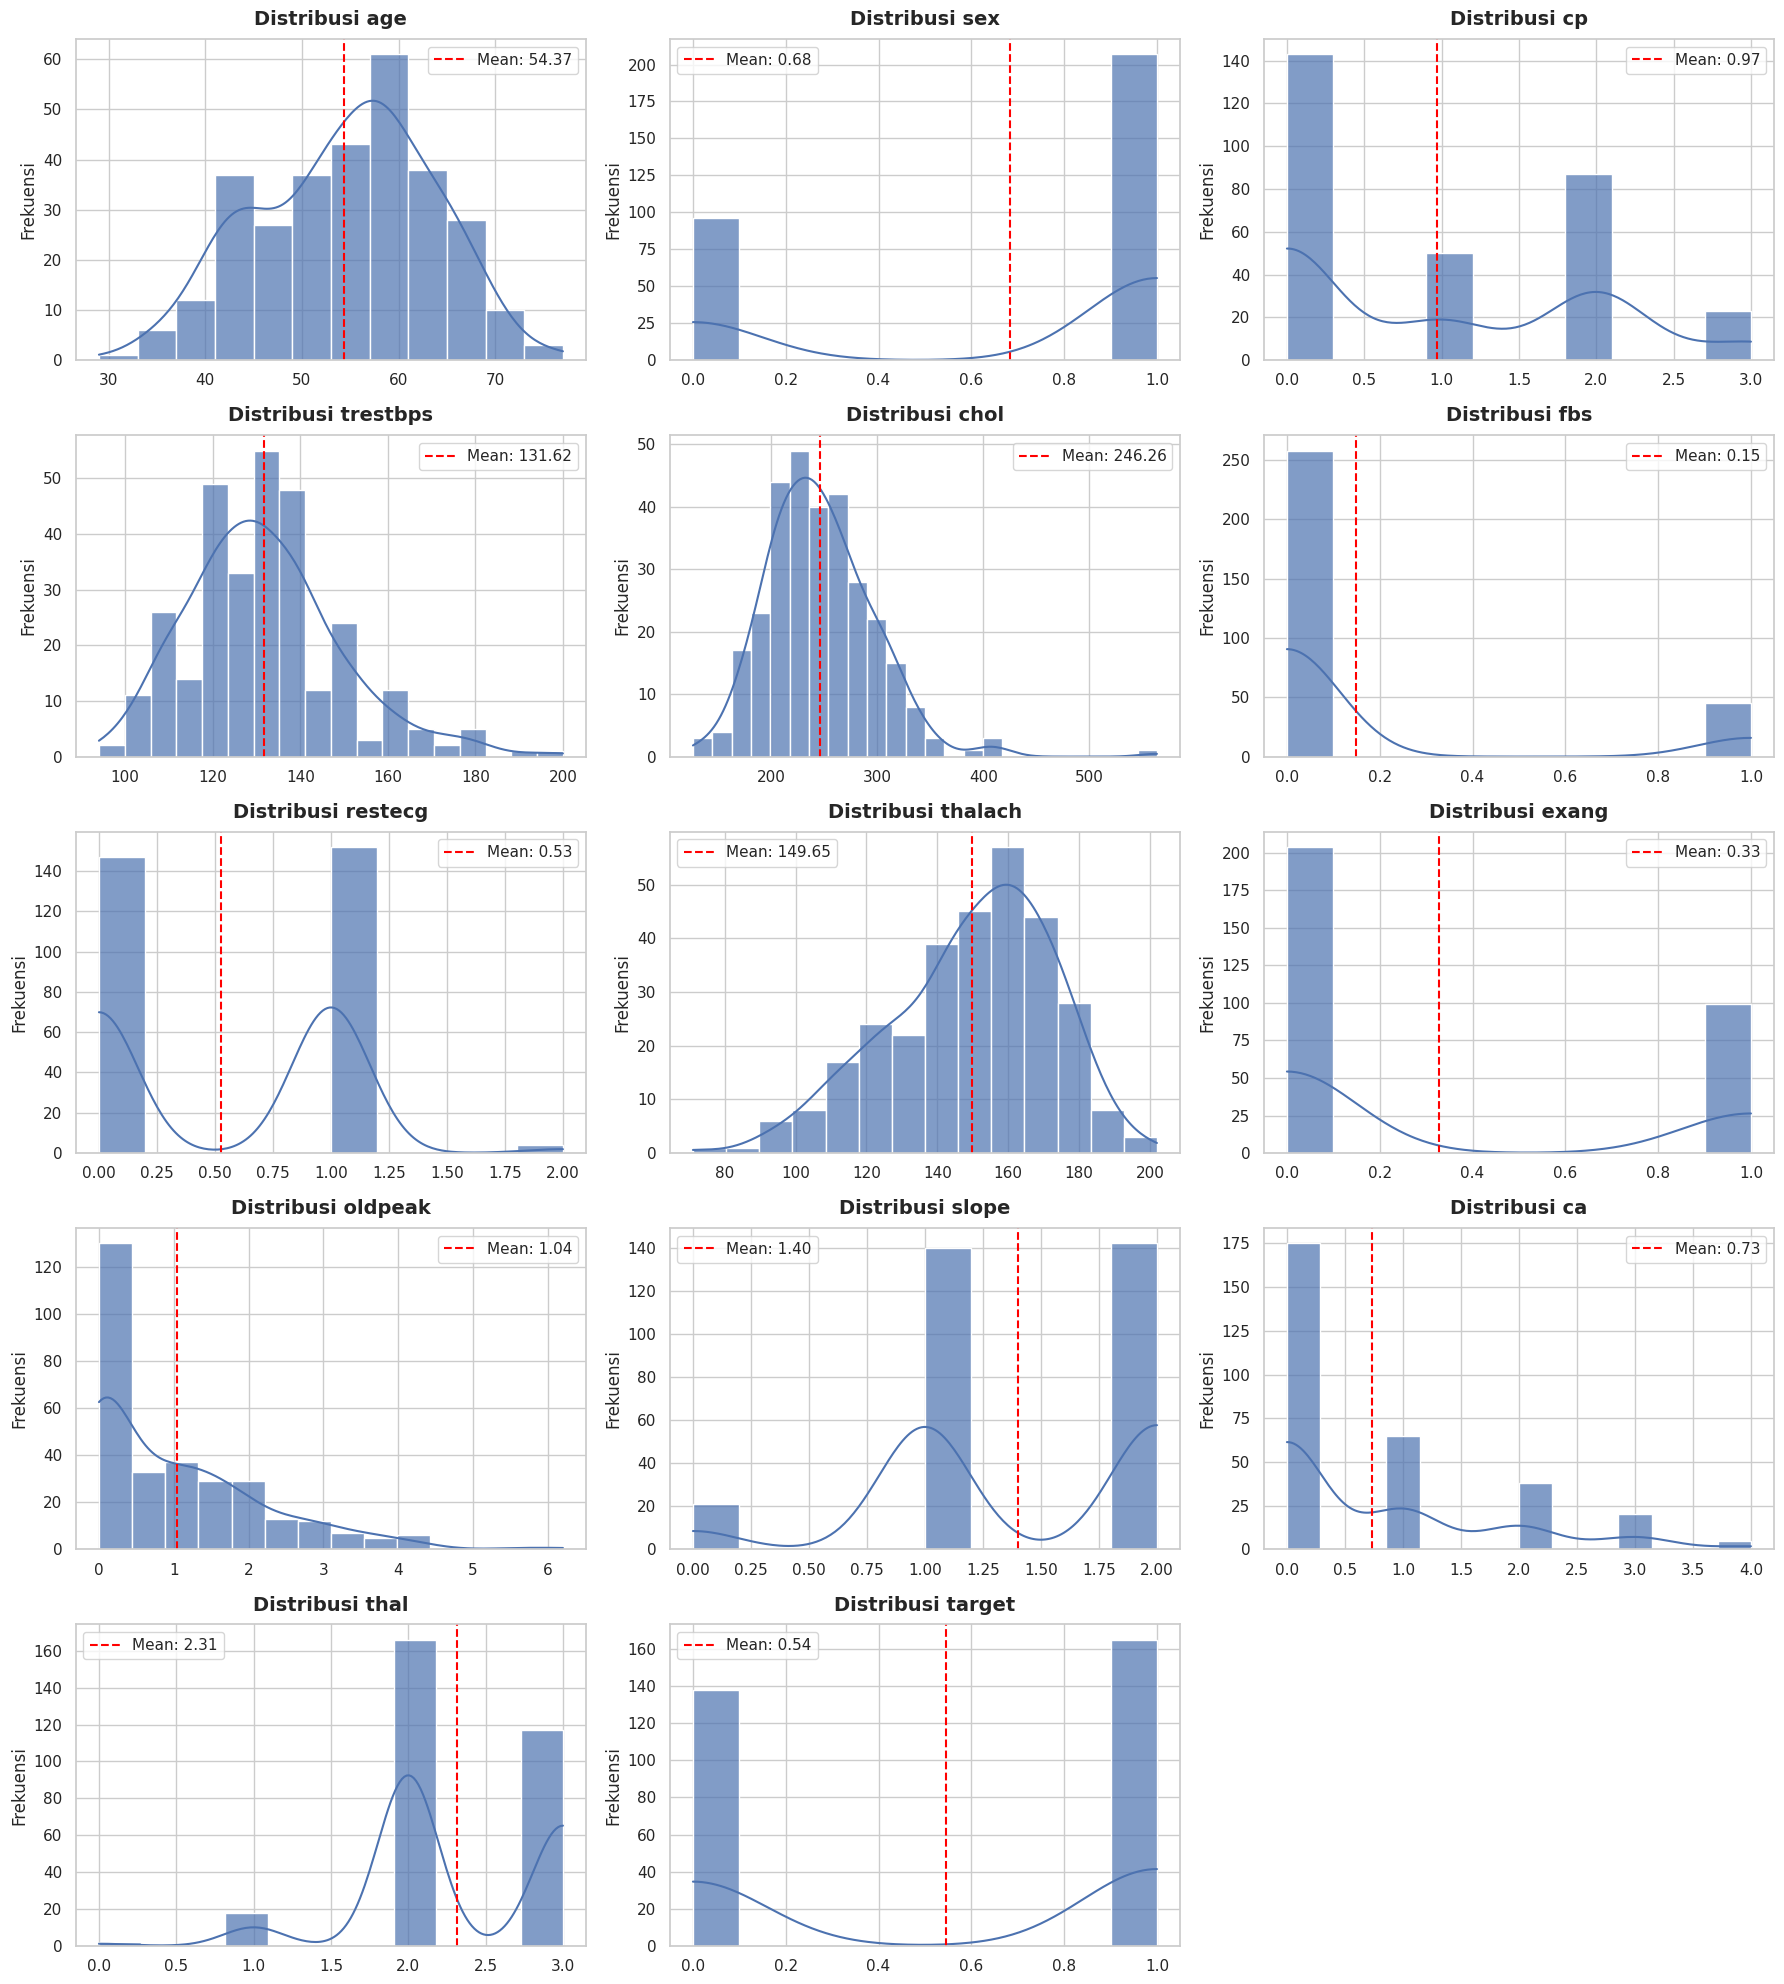

In [23]:
#cek distribusi kolom
sns.set_theme(style="whitegrid")
cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols_plot = 3
n_rows_plot = (len(cols) + n_cols_plot - 1) // n_cols_plot
fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(18, n_rows_plot * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='#4C72B0', edgecolor='w', alpha=0.7)

    axes[i].set_title(f'Distribusi {col}', fontsize=14, fontweight='bold', pad=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frekuensi')

    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
#mencari missing value
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [25]:
#mencari data duplicate
df.duplicated().sum()

np.int64(1)

In [26]:
#outlier
print(df.describe(include='number'))

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

insight
  1. Format data : 303 baris, 14 kolom
  2. Tidak Mising Value
  3. Terdapat Satu Data Duplicate

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [27]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f"ukuran data setelah pembersihan: {df.shape}")

ukuran data setelah pembersihan: (302, 14)


In [28]:
#pisahkan kategorial dan numerik
numerical_cols = [
    'age',        # usia
    'trestbps',   # tekanan darah
    'chol',       # kolesterol
    'thalach',    # detak jantung max
    'oldpeak'     # ST depression
]

categorical_cols = [
    'sex',        # 0=female, 1=male
    'cp',         # chest pain type (0–3)
    'fbs',        # fasting blood sugar (0/1)
    'restecg',    # hasil ECG (0–2)
    'exang',      # exercise induced angina (0/1)
    'slope',      # slope ST segment (0–2)
    'ca',         # jumlah pembuluh darah (0–4) → kategori diskrit
    'thal'        # thalassemia type (0–3)
]

target = 'target'


In [29]:
#normalisasi untuk numerik
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Automate

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

def preprocess_heart_dataset(df, target_col='target',test_size=0.2, random_state=42):
    #pisah target fitur
    X = df.drop(columns=[target_col])
    y = df[target_col]

    #pipeline
    numerical_cols = [
        'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
    ]

    categorical_cols = [
        'sex', 'cp', 'fbs', 'restecg',
        'exang', 'slope', 'ca', 'thal'
    ]

    # 3. Pipeline preprocessing
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ]
    )

    # 4. Train-test split (BELUM di-transform)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 5. Fit & transform
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed, y_train, y_test, preprocessor


Modelling

In [31]:
#modeling dengan mlflow